In [2]:
import numpy as np
from scipy import stats as sps
import matplotlib.pyplot as plt
%matplotlib inline

In [135]:
sample = sps.norm.rvs(size=100)

### Модель N($\theta$, 1)

Оценка методом максимального правдоподобия:

$\widehat{\theta}_n = \overline{X}$.

Сопряженное распределение к нормальному с неизвестным коэффициентом сдвига и с известным коэффициентом масштаба равном 1 — нормальное с параметрами:

$a = \frac{\mu_0 + \sigma_0^2\sum\limits_{i=1}^{n}x_i}{1 + \sigma_0^2n}, \sigma^2= \frac{\sigma_0^2}{1+\sigma_0^2n}$, где $\mu_0, \sigma_0^2$ — параметры априорного распределения. 

Тогда байесовская оценка коэффициента сдвига — мат. ожидание сопряженного распределения — $a$.

In [67]:
def est_bayes((mu, sigma), sample):
    return (float(mu) / (sigma) + sample.cumsum() / 1) \
            / (1. / float(sigma) + (np.arange(1, sample.size + 1))/1)
def est_max(sample):
    return sample.cumsum() / np.arange(1, sample.size + 1) 

Построим оценки для следующих праметров априорного распределения: (0, 1), (0, 100), (10, 1), (10, 100).

In [68]:
parametrs = [(0, 1), (0, 100), (10, 1), (10, 100)]

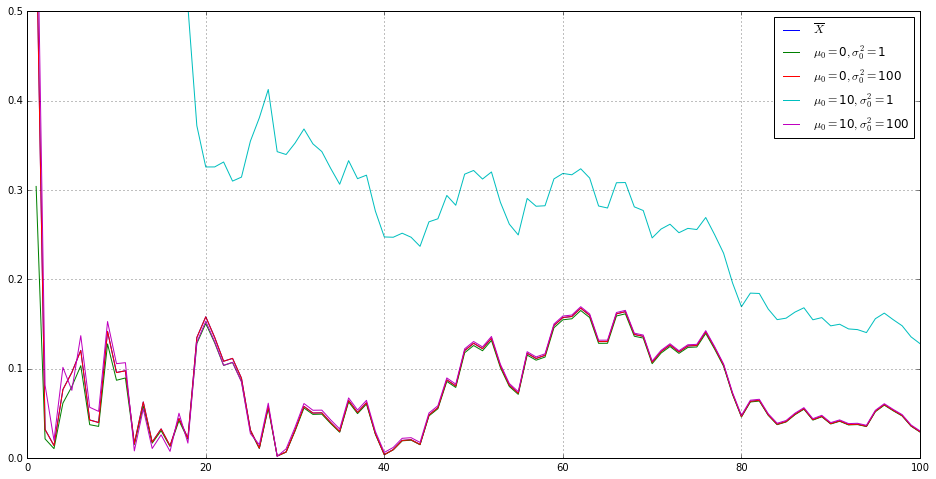

In [69]:
plt.figure(figsize=(16, 8))
x = np.arange(1, 101)
plt.plot(x, np.abs(est_max(sample)), label='$\overline{X}$')
for par in parametrs:
    plt.plot(x, np.abs(est_bayes(par, sample)), label=r'$\mu_0 = $'+str(par[0])+'$, \sigma_0^2=$'+str(par[1]))
plt.legend()
plt.ylim(0, 0.5)
plt.grid()

Наихудшая оценка получается при параметрах (10, 1) априорного распределения. Это объясняется тем, что вероятсноть попадания в небольшую окрестность реального значения параметра очень мала. При остальных параметрах априорного распределния имеем почти одинаковые оценки.

### Модель $N(0, \theta)$

Оценка методом максимального правдоподобия — выборочная дисперсия.

Сопряженное распределение к нормальному с неизвестным параметром масштаба и известным параметром сдвига равным 0 — обратное гамма-распределение с параметрами

$\alpha = \mathbf{\alpha_0}+\frac{n}{2},\, \beta = \mathbf{\beta_0} + \frac{\sum_{i=1}^n{X_i^2}}{2}$, где $\alpha_0, \beta_0$ — параметры априорного распределения.

Тогда байесовская оценка коэффициента масштаба — мат. ожидание сопряженного распределения:

$\widehat{\theta}_n = \frac{\beta}{\alpha - 1} = \frac{2\beta_0 + \sum\limits_{i=1}^{n}X_i^2}{2\alpha_0 + n - 2}$.

In [127]:
def est_bayes((a, b), sample):
    #return (b + (sample ** 2).cumsum() / 2) / (float(a) + np.arange(1, sample.size + 1)/float(2) - 1)
    return (2 * b + (sample ** 2).cumsum()) / (2 * a + np.arange(1, sample.size + 1) - 2)
def est_max(sample):
    return (sample ** 2).cumsum() / (np.arange(1, sample.size + 1))
Theta = 1

Построим оценки для следующих праметров априорного распределения: (1, 1), (1, 100), (10, 1), (10, 100).

In [95]:
parametrs =[(1, 1), (1, 100), (10, 1), (10, 100)]

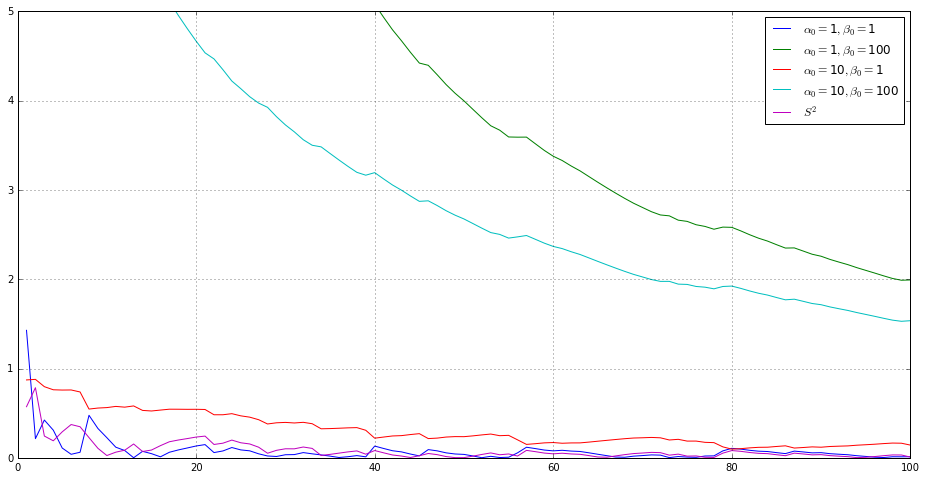

In [143]:
plt.figure(figsize=(16, 8))
x = np.arange(1, sample.size + 1)

for par in parametrs:
    plt.plot(x, np.abs(est_bayes(par, sample) - Theta), label=r'$\alpha_0 = $'+str(par[0])+'$,\\beta_0=$'+str(par[1]))
plt.plot(x, np.abs(est_max(sample) - Theta), label='$S^2$')
plt.legend()
plt.ylim(0, 5)
plt.grid()

Посмотрим на вероятность отрезка $[\theta - 0.25; \theta + 0.25]$ обратного гамма-распределения:

In [159]:
for par in parametrs:
    print par, '—', sps.invgamma.cdf(1.25, a=par[0], scale=par[1]) - sps.invgamma.cdf(0.75, a=par[0], scale=par[1])

(1, 1) — 0.185731826001
(1, 100) — 0.0
(10, 1) — 1.45129113727e-06
(10, 100) — 0.0


Видим, что при параметрах (1, 100), (10, 100) вероятность попадания в отезок $[\theta - 0.25; \theta + 0.25]$ минимальная, т.е. оценка при этих параметрах будует хуже, что и видно на графике. А при параметрах (1, 1) вероятность попадания в этот отрезок наибольшая, значит оценка будет наилучшая, что видно на графике.